## Sprint データセット作成
### 1.このSprintについて

#### Sprintの目的
データセットを作成し学習する
データ拡張を行う

#### どのように学ぶか
自作のデータセットを作り、さらにデータ拡張も行なっていきます。


### 2.自作データセットの学習


自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

#### 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。


In [1]:
!pip install icrawler

  Using cached icrawler-0.6.4.tar.gz (26 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)
  Created wheel for icrawler: filename=icrawler-0.6.4-py2.py3-none-any.whl size=35063 sha256=2d87b3b0026b0cc87872cdd06a2de433f029e24ec4fc157e4e6e1d067aeade2b
  Stored in directory: /Users/a100/Library/Caches/pip/wheels/5b/a5/50/db28e1726fdc127cb6c5a757a4350af44a32b4e5d2c5d45dac
Successfully built icrawler


In [2]:
from icrawler.builtin import BingImageCrawler

# 猫の画像を5枚取得
crawler = BingImageCrawler(storage={"root_dir": "cat"})
crawler.crawl(keyword="猫", max_num=5)
# 犬の画像を5枚取得
crawler = BingImageCrawler(storage={"root_dir": "dog"})
crawler.crawl(keyword="犬", max_num=5)

2021-03-30 11:26:05,480 - INFO - icrawler.crawler - start crawling...
2021-03-30 11:26:05,481 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-03-30 11:26:05,482 - INFO - feeder - thread feeder-001 exit
2021-03-30 11:26:05,483 - INFO - icrawler.crawler - starting 1 parser threads...
2021-03-30 11:26:05,489 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-03-30 11:26:06,001 - INFO - parser - parsing result page https://www.bing.com/images/async?q=猫&first=0
2021-03-30 11:26:06,028 - INFO - downloader - skip downloading file 000001.jpg
2021-03-30 11:26:06,030 - INFO - downloader - skip downloading file 000002.jpg
2021-03-30 11:26:06,032 - INFO - downloader - skip downloading file 000003.jpg
2021-03-30 11:26:06,041 - INFO - downloader - skip downloading file 000004.jpg
2021-03-30 11:26:06,048 - INFO - downloader - skip downloading file 000005.jpg
2021-03-30 11:26:06,187 - INFO - downloader - downloaded images reach max num, thread downloader-001 is ready to ex

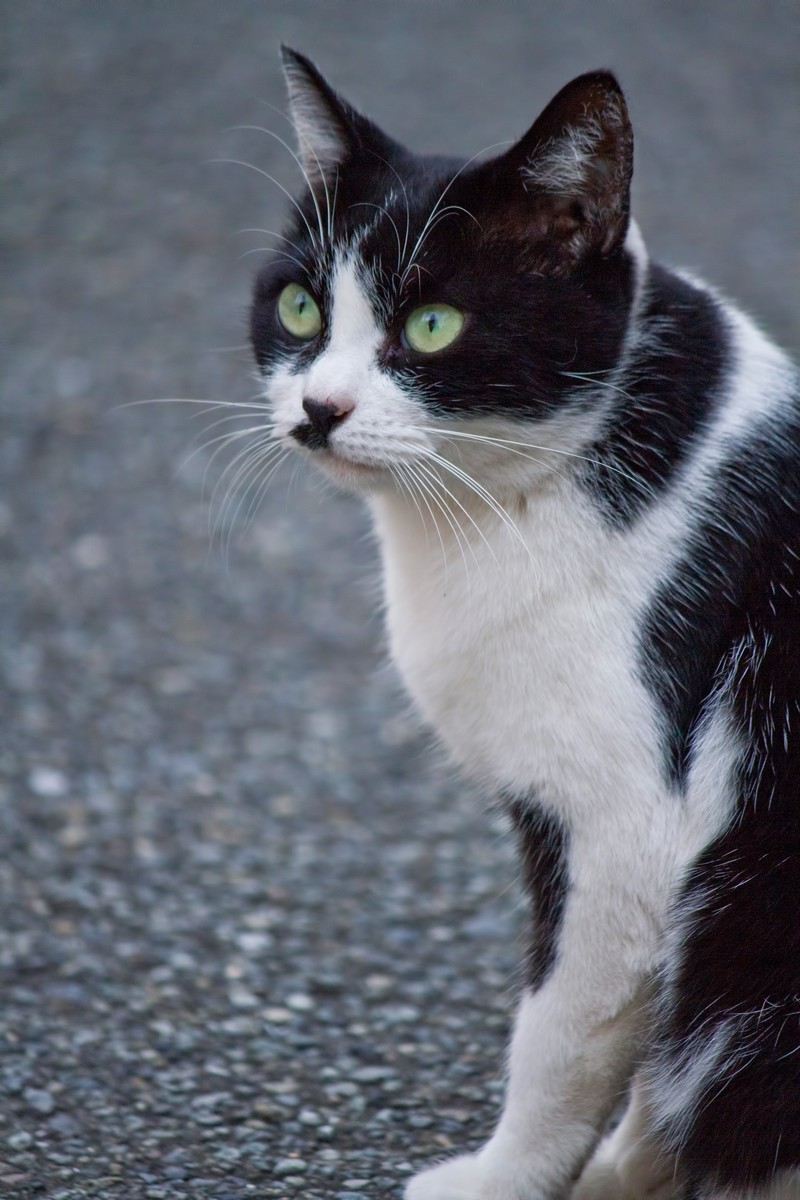

In [3]:
# 猫の画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cat/000001.jpg"))

In [58]:
import tensorflow as tf
model = tf.keras.applications.vgg16.VGG16(weights='imagenet')
import numpy as np

In [10]:
img_cat = glob.glob("./cat" + '/*' + ".jpg")

In [11]:
img_dog = glob.glob("./dog" + '/*' + ".jpg")

In [12]:
img_cat

['./cat/000004.jpg',
 './cat/000005.jpg',
 './cat/000001.jpg',
 './cat/000002.jpg',
 './cat/000003.jpg']

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
    )

In [51]:
train_generator = datagen.flow_from_directory(
    './train',
    target_size=(224, 224),
    class_mode='binary',
    subset='training'
)

Found 6 images belonging to 2 classes.


In [52]:
val_generator = datagen.flow_from_directory(
    './train',
    target_size=(224, 224),
    class_mode='binary',
    subset='validation'
)

Found 2 images belonging to 2 classes.


In [53]:
train_generator.image_shape

(224, 224, 3)

In [54]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [55]:
train_generator.classes

array([0, 0, 0, 1, 1, 1], dtype=int32)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import optimizers

In [106]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
 
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 128)     

In [107]:
model.compile(loss="binary_crossentropy",
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["acc"])

In [108]:
history = model.fit(
    train_generator ,
    epochs=15,
    validation_data=val_generator 
)

Epoch 1/15
1/1 [==============================] - 4s 4s/step - loss: 0.6968 - acc: 0.5000 - val_loss: 0.7375 - val_acc: 0.5000
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 0.6909 - acc: 0.5000 - val_loss: 0.6983 - val_acc: 0.5000
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 0.6593 - acc: 0.5000 - val_loss: 0.6816 - val_acc: 0.5000
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 0.6102 - acc: 0.6667 - val_loss: 0.6659 - val_acc: 0.5000
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 0.5516 - acc: 1.0000 - val_loss: 0.6610 - val_acc: 0.5000
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 0.4949 - acc: 0.8333 - val_loss: 0.6584 - val_acc: 0.5000
Epoch 7/15
1/1 [==============================] - 2s 2s/step - loss: 0.4916 - acc: 0.6667 - val_loss: 0.8519 - val_acc: 0.5000
Epoch 8/15
1/1 [==============================] - 1s 1s/step - loss: 0.5785 - acc: 0.5000 - val_loss: 0.6278 - 

In [109]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = datagen.flow_from_directory(
    './test',
    target_size=(224, 224),
    class_mode='binary',
)

model.evaluate(test_generator)

Found 2 images belonging to 2 classes.
1/1 [==============================] - 1s 564ms/step - loss: 1.1323 - acc: 0.5000


[1.1322640180587769, 0.5]

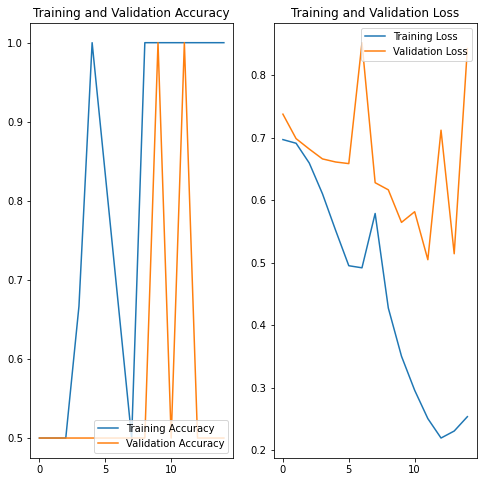

In [149]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



#### 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

《データ拡張のためのライブラリ》

データ拡張にはalbumentationsなどがあります。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries])(https://github.com/albu/albumentations)

また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [119]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img

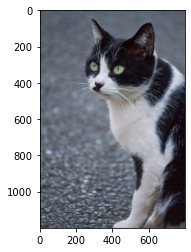

In [126]:
img = load_img("/Users/a100/deep/diveintocode-ml/term2/Sprint/train/cat/000001.jpg")
plt.imshow(img)

In [127]:
# numpyの配列に変換
x = img_to_array(img)

In [130]:
# 4次元配列に変換、以下同じ意味
# x = np.expand_dims(x, axis=0)
x = x.reshape((1,) + x.shape)
 
#（1,縦サイズ, 横サイズ, チャンネル数)
print(x.shape)

(1, 1200, 800, 3)


In [131]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="nearest")

In [132]:
g = datagen.flow(x, batch_size=1)

(1, 1200, 800, 3)
(1, 1200, 800, 3)
(1, 1200, 800, 3)
(1, 1200, 800, 3)


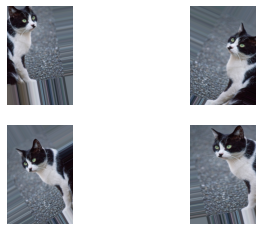

In [138]:
for i in range(4):
    batches = g.next()
    
    #（1,縦サイズ, 横サイズ, チャンネル数)
    print(batches.shape)
    
    # 画像として表示するため、４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
 
    plt.subplot(2, 2, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
 
plt.show()

#### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

《アノテーションのためのツール》

アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

In [169]:
import pandas as pd
pd.read_csv('/Users/a100/deep/diveintocode-ml/term2/Sprint/train/cat--PascalVOC-export/dog-PascalVOC-export/Annotations/000001.xml')

,"<annotation verified=""yes"">"
0,<folder>Annotation</folder>
1,<filename>000001.jpg</filename>
2,<path>dog-PascalVOC-export/Annotations/000...
3,<source>
4,<database>Unknown</database>
5,</source>
6,<size>
7,<width>1198</width>
8,<height>1600</height>
9,<depth>3</depth>


【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [166]:
import albumentations as A
import cv2

In [243]:
# transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
# ], bbox_params=A.BboxParams(format='pascal_voc'))

In [168]:
image = cv2.imread("/Users/a100/deep/diveintocode-ml/term2/Sprint/train/cat--PascalVOC-export/dog-PascalVOC-export/JPEGImages/000001.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [206]:
image

array([[[ 48,  45,  52],
        [ 48,  45,  52],
        [ 48,  45,  52],
        ...,
        [ 81,  87, 111],
        [ 66,  76, 101],
        [ 57,  69,  95]],

       [[ 48,  45,  52],
        [ 48,  45,  52],
        [ 48,  45,  52],
        ...,
        [ 82,  88, 112],
        [ 68,  78, 103],
        [ 58,  70,  96]],

       [[ 47,  46,  52],
        [ 47,  46,  52],
        [ 47,  46,  52],
        ...,
        [ 87,  91, 116],
        [ 70,  80, 105],
        [ 59,  71,  97]],

       ...,

       [[ 80,  67,  51],
        [ 80,  67,  51],
        [ 79,  66,  50],
        ...,
        [ 36,  33,  26],
        [ 35,  32,  25],
        [ 35,  32,  25]],

       [[ 82,  69,  53],
        [ 82,  69,  53],
        [ 81,  68,  51],
        ...,
        [ 36,  33,  26],
        [ 36,  33,  26],
        [ 35,  32,  25]],

       [[ 80,  67,  51],
        [ 80,  67,  51],
        [ 79,  66,  49],
        ...,
        [ 36,  33,  26],
        [ 36,  33,  26],
        [ 36,  33,  26]]

In [196]:
bboxes = [[22, 67,997,1600]]

In [197]:
class_labels = ['dog']

In [231]:
img = cv2.rectangle(image ,(22, 67),(997,1600),(0,255,0),20)

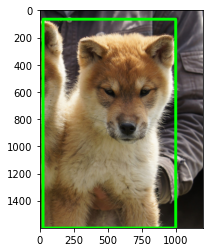

In [232]:
plt.imshow(img)
plt.show()

In [233]:
img.shape

(1600, 1198, 3)

In [234]:
# 4次元配列に変換、以下同じ意味
# x = np.expand_dims(x, axis=0)
img2 = img.reshape((1,) + img.shape)
 
#（1,縦サイズ, 横サイズ, チャンネル数)
print(img2.shape)

(1, 1600, 1198, 3)


In [235]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode="nearest")

In [236]:
img2_dog = datagen.flow(img2, batch_size=1)

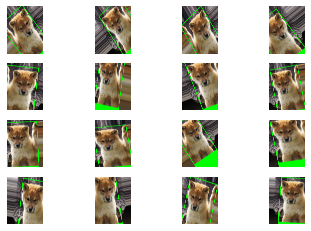

In [242]:
for i in range(16):
    batches = img2_dog.next()
       
    # 画像として表示するため、４次元から3次元データにし、配列から画像にする。
    gen_img = array_to_img(batches[0])
 
    plt.subplot(4, 4, i + 1)
    plt.imshow(gen_img)
    plt.axis('off')
 
plt.show()